In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def detect_line(data):
    todo = [data]
    while todo[0].shape[0]>1:
        outdo = []
        for subar in todo:
            Nf, Nt = subar.shape
            assert(Nf%2 == 0)
            Nfhalf = Nf //2
            vert = np.array ([subar[2*i,:]+subar[2*i+1,:] for i in range(Nfhalf)])
            diag = np.array ([subar[2*i,i:-Nfhalf+i-1]+subar[2*i+1,i+1:-Nfhalf+i] for i in range(Nfhalf)])
            outdo.append(vert)
            outdo.append(diag)
        todo = outdo
    outar = np.zeros_like(data)
    Nf = data.shape[0]
    for i,line in enumerate(outdo):
        outar[i,:line.shape[1]] = line[0,:]
    return outar

In [3]:
def detect_line_indices(data_):
    data = [[[(j,i)] for i in range(data_.shape[1])] for j in range(data_.shape[0])]
    todo = [data]
    while len(todo[0])>1:
        outdo = []
        for subar in todo:
            Nf, Nt = len(subar), len(subar[0])
            assert(Nf%2 == 0)
            vert = [[subar[2*i][j]+subar[2*i+1][j] for j in range(len(subar[2*i+1]))] for i in range(Nf//2)]
            diag =  [[subar[2*i][j+i]+subar[2*i+1][j+i+1] for j in range(len(subar[2*i+1])-i-1)] for i in range(Nf//2)]
            outdo.append(vert)
            outdo.append(diag)
        todo = outdo
    todo = [line[0] for line in todo]
    return todo

In [4]:
Nf,Nt = 64, 150
test = np.zeros((Nf,Nt))
for i in range(Nf):
    test[i,int(30.3+0.4*i)] = 1.0

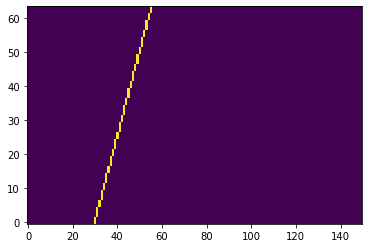

In [5]:
plt.imshow(test,interpolation='nearest',origin='lower',aspect='auto')

In [6]:
ndx = detect_line_indices(test)

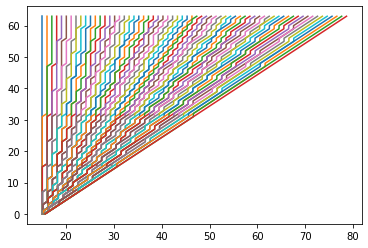

In [7]:
for slope in range(Nf):
    plt.plot([v[1]+0.01*slope for v in ndx[slope][15]],[v[0] for v in ndx[slope][15]],'-')

50.0 3780


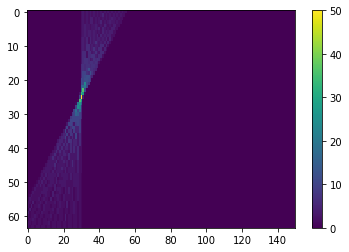

In [10]:
ldet = detect_line(test)
plt.imshow(ldet,aspect='auto', interpolation='nearest')
plt.colorbar()
print(ldet.max(),ldet.argmax())